In [46]:
import pandas as pd 
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Read the data
df = pd.read_csv('./data/trainingData.csv')


In [47]:
# add the sentiment score to the dataframe add the dictionary rows as columns
df = df.join(pd.DataFrame(df['comment'].apply(sentiment.polarity_scores).tolist()))

In [48]:
df.head()

,comment,sentiment,review_rating,author_total_reviews_count,neg,neu,pos,compound
0,Not telkpm I pay R519 per month and can't sign...,0,1,3,0.000,0.966,0.034,0.0762
1,Please help me clear my name I can't even buy ...,0,1,3,0.050,0.788,0.161,0.8608
2,Untrustworthy business I was contacted if I wa...,0,1,50,0.072,0.900,0.028,-0.5994
3,telkom Have been in a fight with TELKOM since ...,0,1,1,0.203,0.730,0.066,-0.9669
4,"TELKOM Killarney Looting on Upgrade -10, \nSo ...",0,1,5,0.099,0.889,0.013,-0.9837


In [49]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

# use review_rating,author_total_reviews_count,neg,neu,pos,compound as features
train_features = train[['neg','neu','pos','compound']].values
test_features = test[['neg','neu','pos','compound']].values

# sentiment is the label
train_labels = train['sentiment'].values
test_labels = test['sentiment'].values


In [50]:
# use sklearn to do the classification for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
knn.score(test_features, test_labels)

#save model to file
import pickle
pickle.dump(knn, open('./models/knn_model.sav', 'wb'))


<AxesSubplot: >

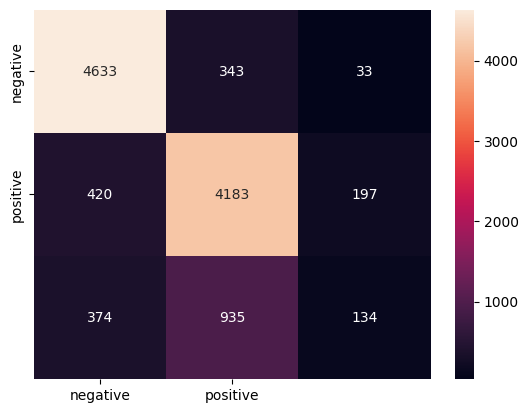

In [51]:
# plot a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(test_labels, knn.predict(test_features))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])




14


Text(0, 0.5, 'Testing Accuracy')

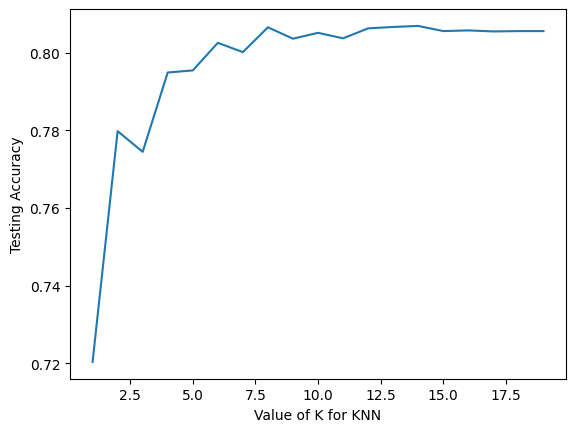

In [52]:
# plot a graph showing the model at different k values
k_range = range(1, 20)
scores = []
bestAccuracy = 0
bestK = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features, train_labels)
    scores.append(knn.score(test_features, test_labels))
    if knn.score(test_features, test_labels) > bestAccuracy:
        bestAccuracy = knn.score(test_features, test_labels)
        bestK = k
print(bestK)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [53]:
print(bestK)
print(bestAccuracy)

14
0.8068787771062922


In [54]:
#load model from file
import pickle
knn = pickle.load(open('./models/knn_model.sav', 'rb'))


def predict_sentiment(text):
    sen = sentiment.polarity_scores(text)
    score = knn.predict([[sen['neg'],sen['neu'],sen['pos'],sen['compound']]])
    if score == 0:
        return 'negative'
    elif score == 1:
        return 'positive'
    else:
        return 'neutral'

In [55]:
# print accuracy
print(knn.score(test_features, test_labels))

0.7954141485958052


In [65]:
reviews = [
    "After a horrible experience ordering online from M**ro, I thought it worth thanking the team at Takealot.com. Twice in the last few weeks I have received an order 2 days before the promised delivery date. This is really impressive, given the busy time of year. Over the last few years I have had to return two items. The return was seamless. Thank you for offering good value and being reliable. When I have needed to query anything I receive a reply within an hour or two tops. Thank you for being committed to and interested in us as customers.  Whether Amazon sets up in SA or not, you will have our support.",
]

for review in reviews:
    print(review, '->', predict_sentiment(review) + '\n')

After a horrible experience ordering online from M**ro, I thought it worth thanking the team at Takealot.com. Twice in the last few weeks I have received an order 2 days before the promised delivery date. This is really impressive, given the busy time of year. Over the last few years I have had to return two items. The return was seamless. Thank you for offering good value and being reliable. When I have needed to query anything I receive a reply within an hour or two tops. Thank you for being committed to and interested in us as customers.  Whether Amazon sets up in SA or not, you will have our support. -> positive



In [57]:
# use sklearn to do the classification for SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(train_features, train_labels)
svm.score(test_features, test_labels)

# run a grid search to find the best parameters for SVM
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(train_features, train_labels)

print(clf.best_params_)
#print accuracy
print(clf.score(test_features, test_labels))

KeyboardInterrupt: 

In [ ]:
# use a decision tree classifier with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[1, 10]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(train_features, train_labels)
print(clf.best_params_)
#print accuracy with best parameters
print(clf.score(test_features, test_labels))

{'criterion': 'gini', 'max_depth': 10}
0.8135442587984358


In [ ]:
# use a random forest classifier with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[1, 10]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)
clf.fit(train_features, train_labels)
print(clf.best_params_)
#print accuracy
print(clf.score(test_features, test_labels))


{'n_estimators': 10}
0.7866157127621756
